# Amazon Yorumları Üzerinden Duygu Analizi ve Modelleme

In [1]:
# 1. Text Preprocessing
# 2. Text Visualization
# 3. Sentiment Analysis
# 4. Feature Engineering
# 5. Sentiment Modeling

In [2]:
!pip install nltk

In [3]:
!pip install textblob

In [4]:
!pip install wordcloud

In [5]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [6]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
# 1. Text Preprocessing

In [8]:
df = pd.read_csv("C:/Users/ASUS/Desktop/YAZ KAMPI/10 - Doğal Dil İşleme ( NLP )/amazon_reviews.csv")

In [9]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [10]:
# Normalizing Case Folding

In [11]:
df['reviewText'] = df['reviewText'].str.lower()

In [12]:
df['reviewText']

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

In [13]:
# Punctuations

In [14]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '', regex=True)

In [15]:
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

In [16]:
# Numbers

In [17]:
df['reviewText'] = df['reviewText'].str.replace('\d', '', regex=True)

In [18]:
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk gb class  to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: reviewText, Length: 4915, dtype: object

In [19]:
# Stopwords

In [20]:
import nltk

In [21]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
sw = stopwords.words('english')

In [23]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
df['reviewText'] = df['reviewText'].apply(lambda x : " ".join(x for x in str(x).split() if x not in sw))


# x => index (mesela döngü başlıyor. 1. indexteyiz. index 1 deki bütün cümle str(x).split ile kelime kelime ayrılıyor.
# Ardından x indeksindeki kelimelerimiz sw içnde var mı yok mu diye bakıyoruz)



`x` burada aslında satırın tamamını, yani `reviewText` sütunundaki her bir metni temsil ediyor. Ancak, `split()` fonksiyonu bu metni kelimelere ayırarak bir listeye dönüştürdüğü için, `x` metni önce bir kelimeler listesine ayrılıyor ve sonrasında bu kelimeler üzerinde işlem yapılıyor.

Özetle:

- `x`, `reviewText` sütunundaki her bir satırdaki metni (yani tüm cümleyi) temsil eder.
- `split()` kullanıldığında, bu metin kelimelere ayrılır ve bu kelimeler liste halinde işlenir. Lambda fonksiyonunun içinde `x` hala bir cümle (satır) olarak başlar, ancak `split()` sonrasında kelimeler listesine dönüşür.
  
Örneğin:

```python
x = "This is a sample sentence"
```

- `str(x).split()` bu cümleyi şu listeye çevirir: `['This', 'is', 'a', 'sample', 'sentence']`.
- Lambda fonksiyonunda bu liste üzerinde işlem yapılır ve eğer kelime `sw` (stopwords) listesinde yoksa, bu kelime tekrar birleştirilerek yeni bir cümle (satır) oluşturulur.

In [25]:
# def remove_stopwords(text):
#     words = text.split()  # Metni kelimelere ayır
#     filtered_words = []  # Filtrelenmiş kelimeleri saklamak için boş bir liste oluştur
#     
#     for word in words:
#         if word not in sw:  # Eğer kelime stopwords listesinde değilse
#             filtered_words.append(word)  # Listeye ekle
#     
#     return " ".join(filtered_words)  # Kelimeleri tekrar birleştir ve döndür
#
#
# df['reviewText'] = df['reviewText'].apply(remove_stopwords)  # Fonksiyonu her bir satır için uygula

In [26]:
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [27]:
# Rarewords

In [28]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

drops = temp_df[temp_df <= 1]

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [29]:
temp_df

card          4603
gb            1725
phone         1685
works         1559
great         1445
              ... 
sharper          1
cheapos          1
gate             1
measuring        1
stealwould       1
Name: count, Length: 9701, dtype: int64

In [30]:
drops

conclusionmy       1
mbsbuy             1
flimsier           1
disappointedtry    1
priceokay          1
                  ..
sharper            1
cheapos            1
gate               1
measuring          1
stealwould         1
Name: count, Length: 5612, dtype: int64

In [31]:
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

Bu kod satırı, bir DataFrame'deki (özellikle `df['reviewText']` sütunundaki) tüm metinlerdeki kelimelerin frekansını (her bir kelimenin kaç kez geçtiğini) hesaplar ve sonuçları bir Pandas Series olarak saklar. İşte bu kodun adım adım açıklaması:

### Kod Satırı:
```python
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()
```

### Adım Adım Açıklama:

1. **`df['reviewText']`:**
   - Bu ifade, `df` adlı DataFrame'deki `reviewText` sütununu alır. Bu sütun, genellikle metin verilerini içerir (örneğin, inceleme yazıları gibi).

2. **`' '.join(df['reviewText'])`:**
   - Bu kısım, `df['reviewText']` sütunundaki tüm satırlardaki metinleri birleştirir. 
   - `join()` fonksiyonu, bir iterable (bu durumda `df['reviewText']`'in tüm satırları) içindeki öğeleri birleştirir ve aralarına belirtilen karakteri (bu durumda boşluk `' '`) ekler.
   - Sonuç olarak, `df['reviewText']` sütunundaki tüm metinler tek bir büyük string (metin) haline gelir, ve bu metinler arasına birer boşluk eklenir.

3. **`.split()`:**
   - Bu kısım, yukarıda birleştirilen büyük string'i (tüm metinleri) kelimelere ayırır.
   - `split()` fonksiyonu, boşluklardan ayırarak bir string'i bir listeye dönüştürür. 
   - Örneğin, `"This is a sample sentence"` metni `['This', 'is', 'a', 'sample', 'sentence']` listesine dönüşür.
   - Sonuç olarak, `split()` fonksiyonu tüm metni kelimelere böler ve bir liste olarak geri döner.

4. **`pd.Series(...).value_counts()`:**
   - `pd.Series(...)` fonksiyonu, yukarıdaki kelime listesini bir Pandas Series'e dönüştürür.
   - `value_counts()` fonksiyonu, Series içindeki her benzersiz öğenin (bu durumda kelimenin) kaç kez tekrarlandığını sayar ve bu frekansları bir Series olarak döndürür.
   - Sonuç olarak, her bir kelimenin metinler içinde kaç kez geçtiğini öğreniriz.

### Genel İşlev:
Bu kod, `df['reviewText']` sütunundaki tüm metinlerdeki kelimeleri sayar ve bu kelimelerin frekanslarını içeren bir Pandas Series oluşturur. Örneğin, `"the"` kelimesi metinlerde 1000 kez geçiyorsa, `temp_df` Series'inde `"the": 1000` şeklinde bir veri bulunur.

In [32]:
# Tokenization

In [33]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

In [35]:
# Lemmatization

In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [38]:
df['reviewText']

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

In [39]:
# 2. Text Visualization

In [40]:
# Terim Frekanslarının Hesaplanması

tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [41]:
tf.columns = ["words", "tf"]

In [42]:
tf.sort_values("tf", ascending=False)

,words,tf
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
...,...,...
2721,sizethe,2.00
2719,everybody,2.00
2717,lived,2.00
3687,chkdsk,2.00


In [43]:
# Barplot

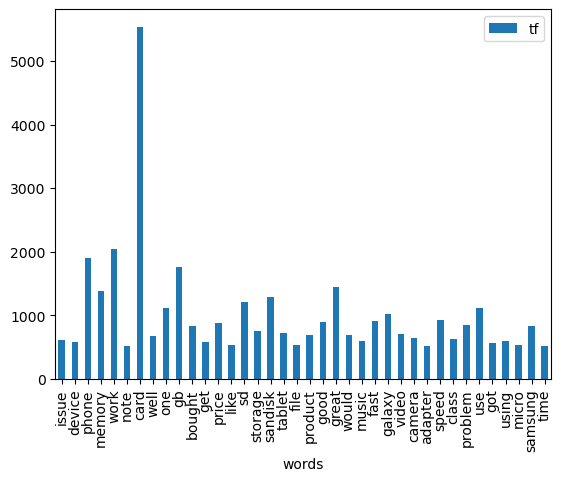

In [44]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

In [45]:
# Wordcloud

In [46]:
text = " ".join(i for i in df.reviewText)


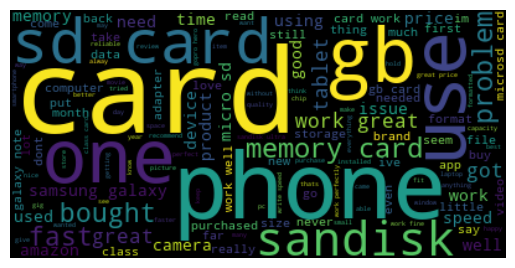

In [47]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)

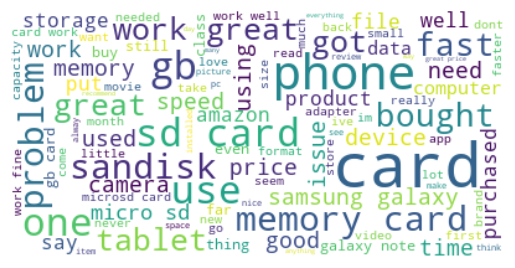

In [49]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [50]:
wordcloud.to_file("wordcloud.png")

In [51]:
# Şablonlara Göre Wordcloud

In [52]:
tr_mask = np.array(Image.open("C:/Users/ASUS/Desktop/YAZ KAMPI/10 - Doğal Dil İşleme ( NLP )/tr.png"))

In [53]:
wc = WordCloud(background_color="white",
               max_words=10000,  # Maksimum kelime sayısını azaltın
               mask=tr_mask,
               contour_width=3,
               contour_color="firebrick",)


wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

ValueError: Couldn't find space to draw. Either the Canvas size is too small or too much of the image is masked out.

In [54]:
# 3. Sentiment Analysis

In [55]:
df["reviewText"].head()

0                                                issue
1    purchased device worked advertised never much ...
2    work expected higher capacity think made bit e...
3    think worked gb card went south one held prett...
4    bought retail packaging arrived legit envelope...
Name: reviewText, dtype: object

In [56]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [57]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The film was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [58]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [59]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...
3    {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...
4    {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co...
7    {'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [60]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.87
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [61]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [62]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",bought sandisk gb class use htc inspire month ...,1.00,Do not waste your money.,1374537600,2013-07-23,503,0,0,0.08
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",used capability samsung galaxy note greatly ex...,5.00,Great item!,1377129600,2013-08-22,473,0,0,0.18
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",great card fast reliable come optional adapter...,5.00,Fast and reliable memory card,1396224000,2014-03-31,252,0,0,0.85
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",good amount space stuff want fit gopro say,5.00,Great little card,1379289600,2013-09-16,448,0,0,0.69


In [63]:
print(df.groupby("overall")['polarity_score'].mean())

overall
1.00   -0.05
2.00    0.07
3.00    0.18
4.00    0.45
5.00    0.52
Name: polarity_score, dtype: float64


In [64]:
# 4. Feature Engineering

In [65]:
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [66]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [67]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",bought sandisk gb class use htc inspire month ...,1.00,Do not waste your money.,1374537600,2013-07-23,503,0,0,0.08,pos
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",used capability samsung galaxy note greatly ex...,5.00,Great item!,1377129600,2013-08-22,473,0,0,0.18,pos
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",great card fast reliable come optional adapter...,5.00,Fast and reliable memory card,1396224000,2014-03-31,252,0,0,0.85,pos
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",good amount space stuff want fit gopro say,5.00,Great little card,1379289600,2013-09-16,448,0,0,0.69,pos


In [68]:
df["sentiment_label"].value_counts()

sentiment_label
pos    3944
neg     971
Name: count, dtype: int64

In [69]:
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.09
pos   4.71
Name: overall, dtype: float64

In [70]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [71]:
y = df["sentiment_label"]
X = df["reviewText"]

In [72]:
# Count Vectors
###############################

# Count Vectors: frekans temsiller
# TF-IDF Vectors: normalize edilmiş frekans temsiller
# Word Embeddings (Word2Vec, GloVe, BERT vs)

# metinleri matematiksel işlemlere sokabilmek için kullanılan yöntemler

# words
# kelimelerin nümerik temsilleri

# characters
# karakterlerin numerik temsilleri

# ngram
a = """Bu örneği anlaşılabilmesi için daha uzun bir metin üzerinden göstereceğim.
N-gram'lar birlikte kullanılan kelimelerin kombinasyolarını gösterir ve feature üretmek için kullanılır"""

In [74]:
TextBlob(a).ngrams(3) # kelimeleri öbeklendirme

[WordList(['Bu', 'örneği', 'anlaşılabilmesi']),
 WordList(['örneği', 'anlaşılabilmesi', 'için']),
 WordList(['anlaşılabilmesi', 'için', 'daha']),
 WordList(['için', 'daha', 'uzun']),
 WordList(['daha', 'uzun', 'bir']),
 WordList(['uzun', 'bir', 'metin']),
 WordList(['bir', 'metin', 'üzerinden']),
 WordList(['metin', 'üzerinden', 'göstereceğim']),
 WordList(['üzerinden', 'göstereceğim', "N-gram'lar"]),
 WordList(['göstereceğim', "N-gram'lar", 'birlikte']),
 WordList(["N-gram'lar", 'birlikte', 'kullanılan']),
 WordList(['birlikte', 'kullanılan', 'kelimelerin']),
 WordList(['kullanılan', 'kelimelerin', 'kombinasyolarını']),
 WordList(['kelimelerin', 'kombinasyolarını', 'gösterir']),
 WordList(['kombinasyolarını', 'gösterir', 've']),
 WordList(['gösterir', 've', 'feature']),
 WordList(['ve', 'feature', 'üretmek']),
 WordList(['feature', 'üretmek', 'için']),
 WordList(['üretmek', 'için', 'kullanılır'])]

In [75]:
# Count Vectors

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1))
X_c = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()  # Eski get_feature_names() yerine get_feature_names_out() kullanın
X_c_array = X_c.toarray()

In [102]:
# ["and" , "document", "first" , "is" , "one" , "second" , "the", "third" , "this"]

In [103]:
print(X_c)

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


In [105]:
feature_names

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [106]:
X_c_array

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [107]:
# n-gram frekans
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
feature_names = vectorizer2.get_feature_names_out()  # Eski get_feature_names() yerine get_feature_names_out() kullanın
X_n_array = X_n.toarray()

In [108]:
feature_names

array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [112]:
X_n_array

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]], dtype=int64)

****************

In [118]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

In [119]:
print(X_count)

  (0, 1639)	1
  (1, 2470)	1
  (1, 813)	1
  (1, 3601)	1
  (1, 60)	1
  (1, 2051)	1
  (1, 2007)	1
  (1, 2275)	1
  (1, 1911)	1
  (1, 2932)	1
  (1, 881)	1
  (1, 1808)	1
  (1, 3110)	1
  (1, 347)	1
  (2, 3600)	1
  (2, 1075)	1
  (2, 1457)	1
  (2, 423)	1
  (2, 3242)	1
  (2, 1830)	1
  (2, 300)	1
  (2, 927)	1
  (2, 3475)	1
  (2, 2209)	1
  (2, 1797)	1
  :	:
  (4913, 3507)	1
  (4913, 3017)	1
  (4913, 1180)	1
  (4913, 2790)	1
  (4913, 118)	1
  (4913, 1345)	1
  (4914, 1295)	1
  (4914, 430)	1
  (4914, 1658)	1
  (4914, 1756)	1
  (4914, 2402)	1
  (4914, 2812)	1
  (4914, 3308)	1
  (4914, 1340)	1
  (4914, 3017)	1
  (4914, 3035)	1
  (4914, 2576)	1
  (4914, 1426)	1
  (4914, 1126)	1
  (4914, 1931)	1
  (4914, 2080)	1
  (4914, 3241)	1
  (4914, 238)	1
  (4914, 3539)	1
  (4914, 689)	1


In [120]:
print(vectorizer.get_feature_names_out()[10:15])

['access' 'accessed' 'accessible' 'accessing' 'accessory']


In [121]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

*************

In [ ]:
# TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency), metin madenciliği ve bilgi erişimi alanlarında yaygın olarak kullanılan bir ağırlıklandırma yöntemidir. Bu yöntem, kelimelerin bir belge veya bir koleksiyon içindeki önemini ölçmek için kullanılır. TF-IDF, bir kelimenin önemini hem o belgede ne kadar sık geçtiğiyle hem de tüm koleksiyondaki genel yaygınlığıyla değerlendirir.

TF-IDF'nin iki ana bileşeni vardır:

### 1. Term Frequency (TF) - Terim Frekansı

Terim frekansı, bir kelimenin belirli bir belgede kaç kez geçtiğini ölçer. Genellikle bu, kelimenin belgede geçen toplam kelime sayısına bölünmesiyle hesaplanır. Formülü şu şekildedir:

\[ \text{TF}(t, d) = \frac{\text{Sayısal Occurrence of } t \text{ in } d}{\text{Total Number of Terms in } d} \]

- \( t \) = kelime (terim)
- \( d \) = belge

Bu formül, kelimenin belgedeki önemini değerlendirir. Ancak sadece belgedeki sıklığına bakmak yeterli değildir, çünkü bazı kelimeler tüm belgelerde sıkça bulunabilir.

### 2. Inverse Document Frequency (IDF) - Ters Belge Frekansı

Ters belge frekansı, bir kelimenin tüm koleksiyon içindeki nadirliğini ölçer. Eğer bir kelime koleksiyon içinde birçok belgede geçiyorsa, bu kelime genellikle daha az bilgi verici olarak kabul edilir. Formülü şu şekildedir:

\[ \text{IDF}(t, D) = \log \frac{\text{Total Number of Documents}}{\text{Number of Documents Containing } t} \]

- \( t \) = kelime (terim)
- \( D \) = tüm belge koleksiyonu

Bu formül, kelimenin koleksiyon içindeki genel yaygınlığını ölçer ve nadir kelimeleri öne çıkarır.

### TF-IDF Hesaplama

TF ve IDF değerlerinin çarpımı, kelimenin belgedeki önemini ölçen TF-IDF değerini verir. Formülü şu şekildedir:

\[ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) \]

Bu formül, bir kelimenin hem belgede ne kadar sık geçtiğini hem de tüm koleksiyon içindeki yaygınlığını dikkate alarak kelimenin önemini hesaplar.

### Örnek

Bir koleksiyon içinde "veri bilimi" terimi şu şekilde hesaplanabilir:

1. **TF (Term Frequency):** Eğer "veri bilimi" terimi bir belgede 5 kez geçiyorsa ve belge içindeki toplam kelime sayısı 100 ise, TF değeri 5/100 = 0.05 olur.

2. **IDF (Inverse Document Frequency):** Eğer "veri bilimi" terimi koleksiyon içindeki 10 belgeden 3'ünde geçiyorsa ve toplamda 100 belge varsa, IDF değeri şöyle hesaplanır:

   \[
   \text{IDF}(\text{"veri bilimi"}) = \log \frac{100}{3} \approx 1.52
   \]

3. **TF-IDF:** TF ve IDF değerlerini çarparız:

   \[
   \text{TF-IDF}(\text{"veri bilimi"}) = 0.05 \times 1.52 = 0.076
   \]

Bu hesaplamalar, "veri bilimi" teriminin bu belgede önemli bir terim olup olmadığını değerlendirir. TF-IDF, belge içindeki kelimelerin önemini daha doğru bir şekilde anlamanızı sağlar.

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()

In [123]:
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [125]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

In [127]:
# 5. Sentiment Modeling

In [128]:
# 1. Text Preprocessing
# 2. Text Visualization
# 3. Sentiment Analysis
# 4. Feature Engineering
# 5. Sentiment Modeling

In [129]:
# Logistic Regression

In [130]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

In [131]:
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.830111902339776

In [147]:
#new_review = pd.Series("this product is great")
#new_review = pd.Series("look at that shit very bad")
new_review = pd.Series("it was good but I am sure that it fits me")

In [148]:
new_review = TfidfVectorizer().fit(X).transform(new_review)

In [149]:
log_model.predict(new_review)

array([1])

In [150]:
random_review = pd.Series(df["reviewText"].sample(1).values)

In [151]:
new_review = TfidfVectorizer().fit(X).transform(random_review)

In [152]:
log_model.predict(new_review)

array([1])

In [153]:
# Random Forests

In [154]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.8390640895218718

In [155]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8272634791454732

In [156]:
# TF-IDF N-GRAM
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.7837232960325534

In [157]:
# Hiperparametre Optimizasyonu

In [158]:
rf_model = RandomForestClassifier(random_state=17)

In [159]:
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

In [160]:
rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [161]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [162]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

In [163]:
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.8130213631739572